In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from ikapati.data import io
from ikapati.visualization import visualize

In [28]:
species = "Tomato"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")
base_dir = pathlib.Path.cwd()

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Tomato - train_dir: ../data/processed/Tomato - metadata_file_path: ../data/processed/Tomato/metadata.json


In [29]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: d57c545d-158d-4bd2-8474-1e3cc4eddf81


In [30]:
training_log_path = model_dir.joinpath(model_id, "training.log")
training_log = pd.read_csv(training_log_path)

In [31]:
model_dir_paths = training_log["model_dir_path"].values
model_dir_paths

array(['models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__04_0122',
       'models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__04_1019',
       'models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__04_2726',
       'models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__04_3621',
       'models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__04_4924'],
      dtype=object)

In [32]:
training_log

,start_time,end_time,activation,model_dir_path,learning_rate,dropout,epochs,batch_size
0,2020-02-03__04_0122,2020-02-03__04_0945,relu,models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/20...,0.100,False,20,64
1,2020-02-03__04_1019,2020-02-03__04_1851,relu,models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/20...,0.010,False,20,64
2,2020-02-03__04_2726,2020-02-03__04_3540,relu,models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/20...,0.001,False,20,64
3,2020-02-03__04_3621,2020-02-03__04_4436,relu,models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/20...,0.001,True,20,64
4,2020-02-03__04_4924,2020-02-03__04_5755,linear,models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/20...,0.001,True,20,64


# Evaluation

In [35]:
def run_evaluation(log_row):
    model_dir_path = log_row.model_dir_path
    learning_rate = log_row.learning_rate
    activation = log_row.activation
    model_metadata_file_path = pathlib.Path("..", model_dir_path, "metadata.json")
    model_metadata = io.read_metadata(str(model_metadata_file_path))
    print(
        "batch_size:", model_metadata["arguments"]["batch_size"], 
        "activation:", model_metadata["arguments"]["epochs"],
        "architecture:", model_metadata["arguments"]["architecture"],
        "dropout:", model_metadata["arguments"]["dropout"],
    )
    dropout = "-dropout" if model_metadata["arguments"]["dropout"] else ""
    history = model_metadata["history"]
    metrics_df = visualize.create_metrics_dataframe(history)
    loss_plot = visualize.learning_curves("loss", metrics_df)
    visualize.save_plot(loss_plot, f"../reports/figures/{species}-{activation}{dropout}_{learning_rate}.loss.svg")
    plt.clf()
    accuracy_plot = visualize.learning_curves("accuracy", metrics_df)
    visualize.save_plot(accuracy_plot, f"../reports/figures/{species}-{activation}{dropout}_{learning_rate}.accuracy.svg")
    plt.clf()

In [36]:
for index, log_row in training_log.iterrows():
    run_evaluation(log_row)

batch_size: 64 activation: 20 architecture: alexnet dropout: False
batch_size: 64 activation: 20 architecture: alexnet dropout: False
batch_size: 64 activation: 20 architecture: alexnet dropout: False
batch_size: 64 activation: 20 architecture: alexnet dropout: True
batch_size: 64 activation: 20 architecture: alexnet dropout: True


<Figure size 432x288 with 0 Axes>

## ReLU

In [8]:
model_metadata_file_path = pathlib.Path("..", training_logs["relu"], "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [9]:
model_metadata

{'id': 'bdf2d925-484f-48ff-b071-62be7c3b6abb',
 'start_time': '2020-02-03__00_5807',
 'arguments': {'batch_size': 64,
  'epochs': 20,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': False,
  'architecture': 'alexnet',
  'dropout': False},
 'dataset': {'id': 'bdf2d925-484f-48ff-b071-62be7c3b6abb',
  'species': 'Potato',
  'num_classes': 3,
  'class_names': ['Potato___Early_blight',
   'Potato___Late_blight',
   'Potato___healthy'],
  'created_date': '2020-02-02 18:49:05',
  'file_counts': {'train': 1721, 'test': 215, 'eval': 216}},
 'history': {'loss': [1.054021051296821,
   0.6090362690962278,
   0.43197257816791534,
   0.390328175173356,
   0.33017350332095075,
   0.28245423705532,
   0.21108631560435662,
   0.15900450443419126,
   0.13998620570279086,
   0.08166714592908438,
   0.22891520271794155,
   0.12893597753002092,
   0.18983718638236707,
   0.09673012850376275,
   0.07627422183465499,
   0.0685034690854641,
   0.0686329615732225,
   0.04727202163149531,
 

In [10]:
history = model_metadata["history"]

In [11]:
metrics_df = visualize.create_metrics_dataframe(history)

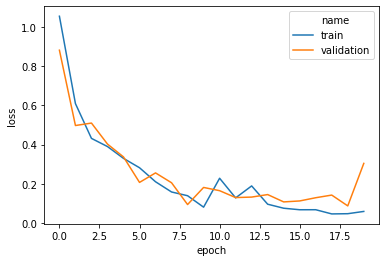

In [12]:
loss_plot = visualize.learning_curves("loss", metrics_df)

In [13]:
visualize.save_plot(loss_plot, f"../reports/figures/{species}-relu.loss.png")

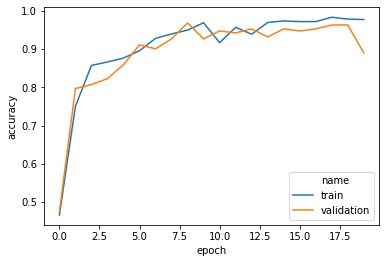

In [14]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [15]:
visualize.save_plot(accuracy_plot, f"../reports/figures/{species}-relu.accuracy.png")

## ReLU with Dropout

In [16]:
dropout_model_metadata_file_path = pathlib.Path("..", training_logs["relu-dropout"], "metadata.json")
dropout_model_metadata = io.read_metadata(str(dropout_model_metadata_file_path))

In [17]:
dropout_model_metadata

{'id': 'bdf2d925-484f-48ff-b071-62be7c3b6abb',
 'start_time': '2020-02-03__00_5925',
 'arguments': {'batch_size': 64,
  'epochs': 20,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': False,
  'architecture': 'alexnet',
  'dropout': True},
 'dataset': {'id': 'bdf2d925-484f-48ff-b071-62be7c3b6abb',
  'species': 'Potato',
  'num_classes': 3,
  'class_names': ['Potato___Early_blight',
   'Potato___Late_blight',
   'Potato___healthy'],
  'created_date': '2020-02-02 18:49:05',
  'file_counts': {'train': 1721, 'test': 215, 'eval': 216}},
 'history': {'loss': [0.8824832829145285,
   0.45843090460850644,
   0.4229932404481448,
   0.35738814220978665,
   0.30848408203858596,
   0.3431357867442645,
   0.2773864882496687,
   0.20663685351610184,
   0.1650504072984824,
   0.1792178311600135,
   0.17240112905318922,
   0.13800006503095993,
   0.09619399264025,
   0.15835563480280912,
   0.14579115285036656,
   0.10293847515892524,
   0.062440800874565654,
   0.04598576883570506,


In [18]:
dropout_history = dropout_model_metadata["history"]

In [19]:
dropout_metrics_df = visualize.create_metrics_dataframe(dropout_history)

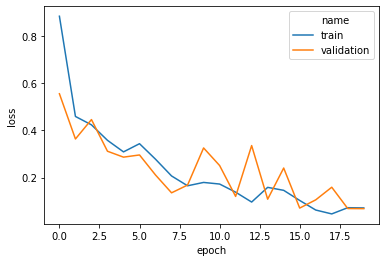

In [20]:
dropout_loss_plot = visualize.learning_curves("loss", dropout_metrics_df)

In [21]:
visualize.save_plot(dropout_loss_plot, f"../reports/figures/{species}-relu-dropout.loss.png")

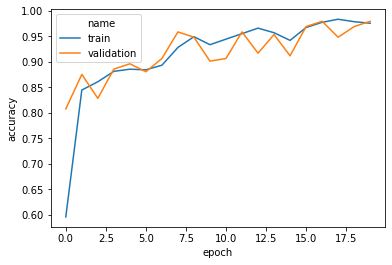

In [22]:
dropout_accuracy_plot = visualize.learning_curves("accuracy", dropout_metrics_df)

In [23]:
visualize.save_plot(dropout_accuracy_plot, f"../reports/figures/{species}-relu.accuracy.png")